# Big mart Sales Data Predictive System Using Machine Learning

## Importing Libraries

In [939]:
import numpy as np # linear algebra
import pandas as pd # data processing
from sklearn.metrics import accuracy_score # checking the accuracy score of predicted result
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Load Dataset using pandas

In [940]:
bigmart_dataset = pd.read_csv('data/bigmart_sales_dataset.csv')

## Exploratory Data Analysis & Data Preprocessing

In [941]:
# counting the rows and columns
bigmart_dataset.shape

(8523, 12)

In [942]:
bigmart_dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [943]:
bigmart_dataset.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [944]:
# getting all the statistical information about the item outlet sales column.
bigmart_dataset['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

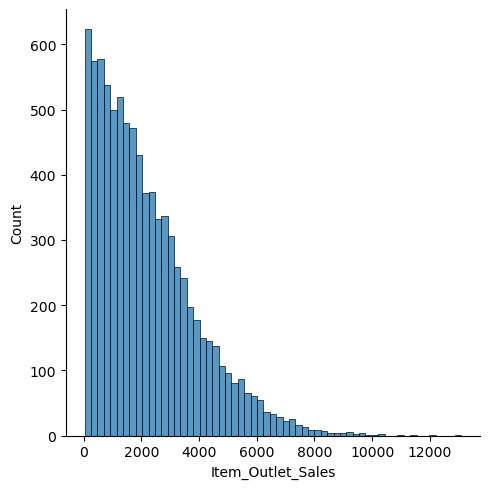

In [945]:
sns.displot(bigmart_dataset['Item_Outlet_Sales'])

1. Deviate from the normal distribution.
2. Have appreciable positive skewness.
3. Show peakedness.

In [946]:
print(f"Skewness: {bigmart_dataset['Item_Outlet_Sales'].skew()}")
print(f"Kurtsis: {bigmart_dataset['Item_Outlet_Sales'].kurt()}")

Skewness: 1.1775306028542796
Kurtsis: 1.6158766814287264


In [947]:
# data types checking 
bigmart_dataset.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [948]:
categorical_features = bigmart_dataset.select_dtypes(include=[object]) # taking all the fields contains object datatype
categorical_features.head(2)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2


In [949]:
numerical_features = bigmart_dataset.select_dtypes(include=[np.number])# taking all the fields contains numeric(int,float) datatypes
numerical_features.head(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228


In [950]:
# outlet establishment year count
bigmart_dataset['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [951]:
# how many unique values are there in our dataset.
bigmart_dataset.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

#### Lets start looking Outlet_Size, Outlet_Location_Type, and Outlet_Type distribution in Item_Outlet_Sale

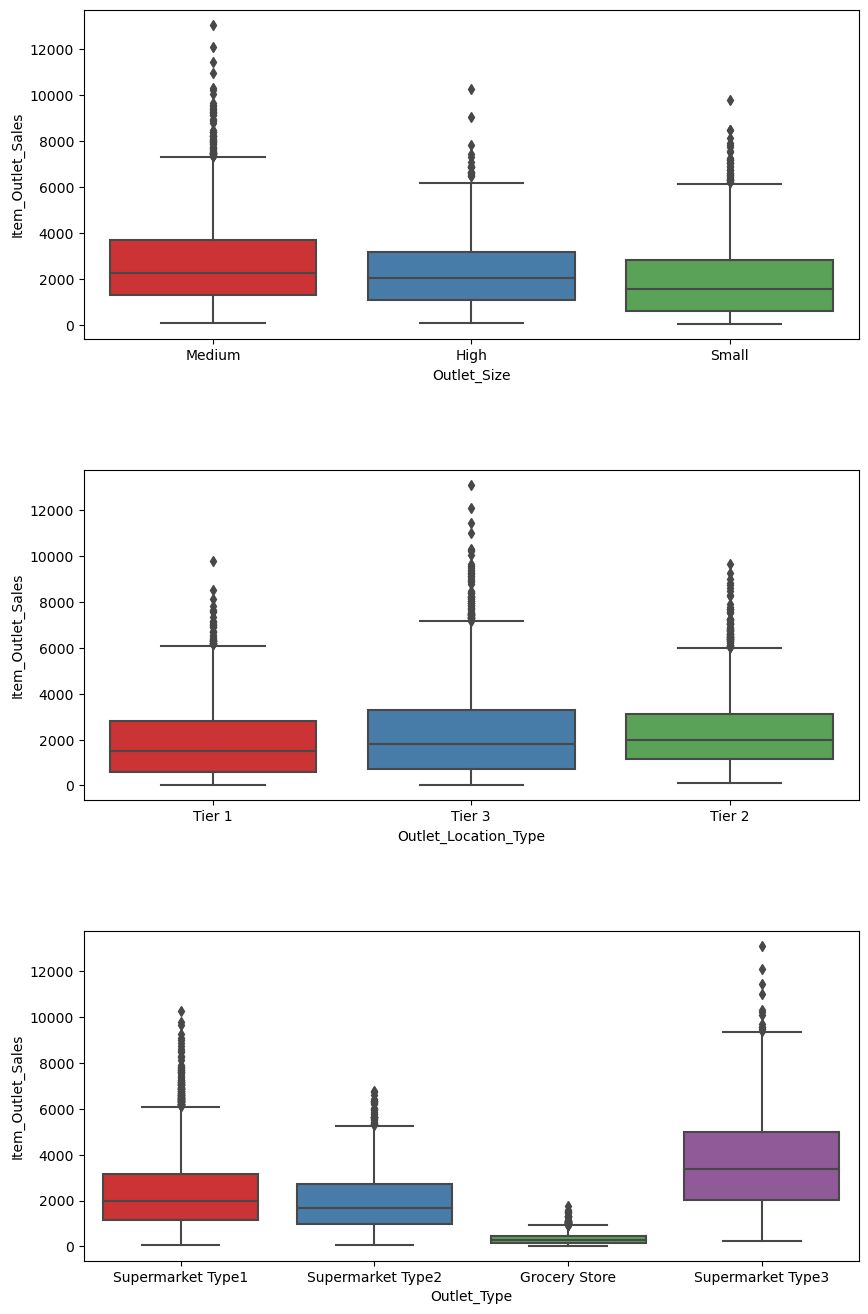

In [952]:
plt.figure(figsize=(10,9))

plt.subplot(311)
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',data=bigmart_dataset,palette='Set1')

plt.subplot(312)
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=bigmart_dataset, palette="Set1")

plt.subplot(313)
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=bigmart_dataset, palette="Set1")

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 1.5)

plt.show()

### Data Cleaning and Imputing Missing Values

In [953]:
# checking the dataset contains null values
bigmart_dataset.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [954]:
item_avg_weight = bigmart_dataset.pivot_table(values='Item_Weight', index='Item_Identifier')
item_avg_weight.head()

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115


In [955]:
missing_values_item_weight = bigmart_dataset['Item_Weight'].isnull()
print(f'missing_values_item_weight : {sum(missing_values_item_weight)}')

missing_values_item_weight : 1463


/var/folders/2l/jkksn9096h725d4d5b24jssw0000gn/T/ipykernel_45864/2367571752.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bigmart_dataset.Item_Weight)


<AxesSubplot: xlabel='Item_Weight', ylabel='Density'>

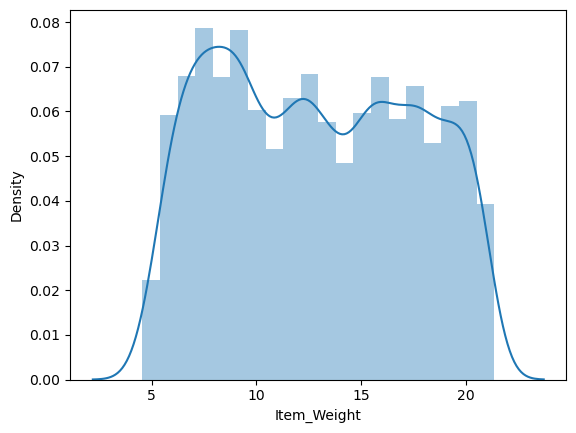

In [956]:
sns.distplot(bigmart_dataset.Item_Weight)

Mean -> average value\
\
Mode -> most repeated value

In [957]:
# mean value of the "item_weight" column
bigmart_dataset['Item_Weight'].mean()

12.857645184136183

In [958]:
# filling the missing values in "Item_Weight" column with mean strategy
bigmart_dataset['Item_Weight'].fillna(bigmart_dataset['Item_Weight'].mean(),inplace=True)

In [959]:
bigmart_dataset.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [960]:
#missing values before and after imputation to confirm
missing_values_outlet_size = bigmart_dataset['Outlet_Size'].isnull()
print(f"before imputing the outlet size : {sum(missing_values_outlet_size)}")

before imputing the outlet size : 2410


#### Replacing the missing values in "Outlet_Size" with Mode strategy

In [961]:
mode_of_outlet_size = bigmart_dataset.pivot_table(values='Outlet_Size',columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [962]:
mode_of_outlet_size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [963]:
missing_values_of_outlet_size = bigmart_dataset['Outlet_Size'].isnull()

In [964]:
missing_values_of_outlet_size

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [965]:
bigmart_dataset.loc[missing_values_of_outlet_size,'Outlet_Size'] = bigmart_dataset.loc[missing_values_of_outlet_size,'Outlet_Type'].apply(lambda x: mode_of_outlet_size[x])

In [966]:
print(f"after the imputation : {sum(bigmart_dataset['Outlet_Size'].isnull())}")

after the imputation : 0


In [967]:
bigmart_dataset.isnull().sum() #final checkup

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

#### Modify Item_Visibility
The minimum value here is 0, which makes no practical sense. Lets consider it like missing information and impute it with mean visibility of that product.

In [968]:
#Determine average visibility of a product
visibility_avg = bigmart_dataset.pivot_table(values='Item_Visibility', index='Item_Identifier')
print(f"visibility_avg :{visibility_avg}")

visibility_avg :                 Item_Visibility
Item_Identifier                 
DRA12                   0.031956
DRA24                   0.048062
DRA59                   0.134718
DRB01                   0.082126
DRB13                   0.008002
...                          ...
NCZ30                   0.024956
NCZ41                   0.051623
NCZ42                   0.009044
NCZ53                   0.027775
NCZ54                   0.080426

[1559 rows x 1 columns]


In [969]:
#Impute 0 values with mean visibility of that product:
missing_values_visibility_items = (bigmart_dataset['Item_Visibility'] == 0)
print (f"Number of 0 values before modification:{sum(missing_values_visibility_items)}")

Number of 0 values before modification:526


In [970]:
bigmart_dataset.loc[missing_values_visibility_items,'Item_Visibility'] = bigmart_dataset.loc[missing_values_visibility_items,'Item_Identifier'].apply(lambda x:visibility_avg.at[x,'Item_Visibility'])
print(f"Number of 0 values after modification: {sum(bigmart_dataset['Item_Visibility'] == 0)}")

Number of 0 values after modification: 0


## Data Analysis after fix missing values

In [971]:
bigmart_dataset.describe() #statistical information about all the dataset

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.069670,140.992782,1997.831867,2181.288914
std,4.226124,0.049810,62.275067,8.371760,1706.499616
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,9.310000,0.031114,93.826500,1987.000000,834.247400
50%,12.857645,0.056922,143.012800,1999.000000,1794.331000
75%,16.000000,0.097160,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


/var/folders/2l/jkksn9096h725d4d5b24jssw0000gn/T/ipykernel_45864/4182116943.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bigmart_dataset['Item_Weight'])


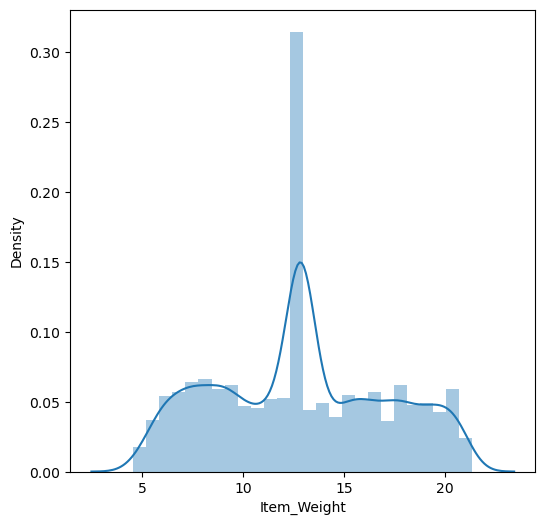

In [972]:
# Item_weight distribution
plt.figure(figsize=(6,6))
sns.distplot(bigmart_dataset['Item_Weight'])
plt.show()

/var/folders/2l/jkksn9096h725d4d5b24jssw0000gn/T/ipykernel_45864/3037989193.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bigmart_dataset['Item_Visibility'])


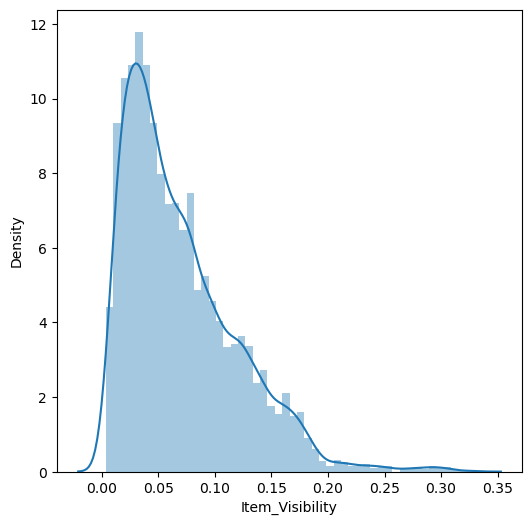

In [973]:
# Item_Visibility distribution
plt.figure(figsize=(6,6))
sns.distplot(bigmart_dataset['Item_Visibility'])
plt.show()

/var/folders/2l/jkksn9096h725d4d5b24jssw0000gn/T/ipykernel_45864/2781101220.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bigmart_dataset['Item_MRP'])


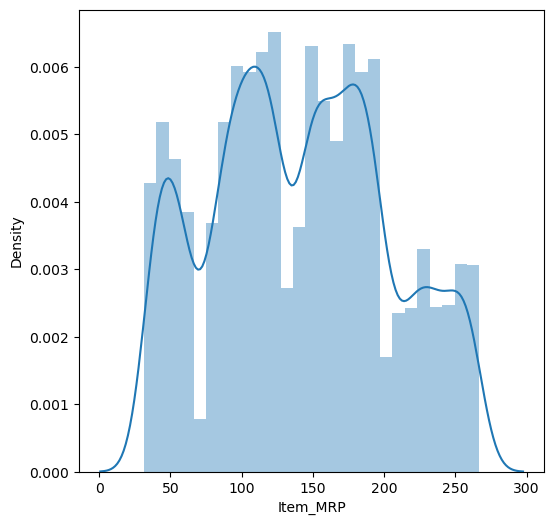

In [974]:
# Item_MRP distribution
plt.figure(figsize=(6,6))
sns.distplot(bigmart_dataset['Item_MRP'])
plt.show()

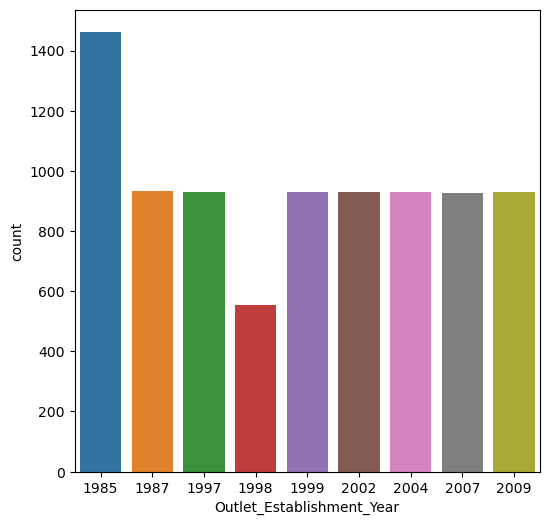

In [975]:
# Outlet_Establishment_Year column
plt.figure(figsize=(6,6))
sns.countplot(x="Outlet_Establishment_Year",data=bigmart_dataset)
plt.show()

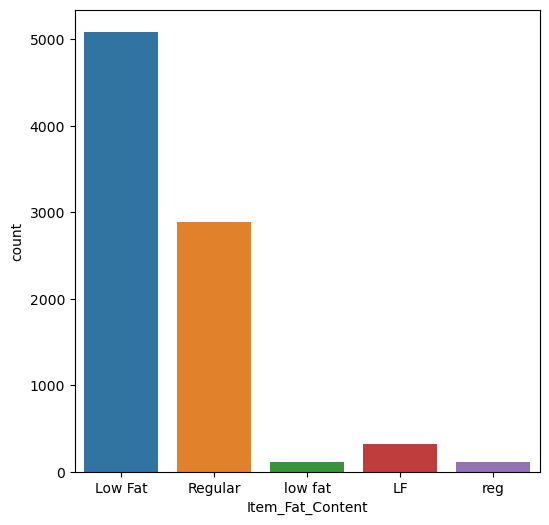

In [976]:
# Outlet_Establishment_Year column
plt.figure(figsize=(6,6))
sns.countplot(x="Item_Fat_Content",data=bigmart_dataset)
plt.show()

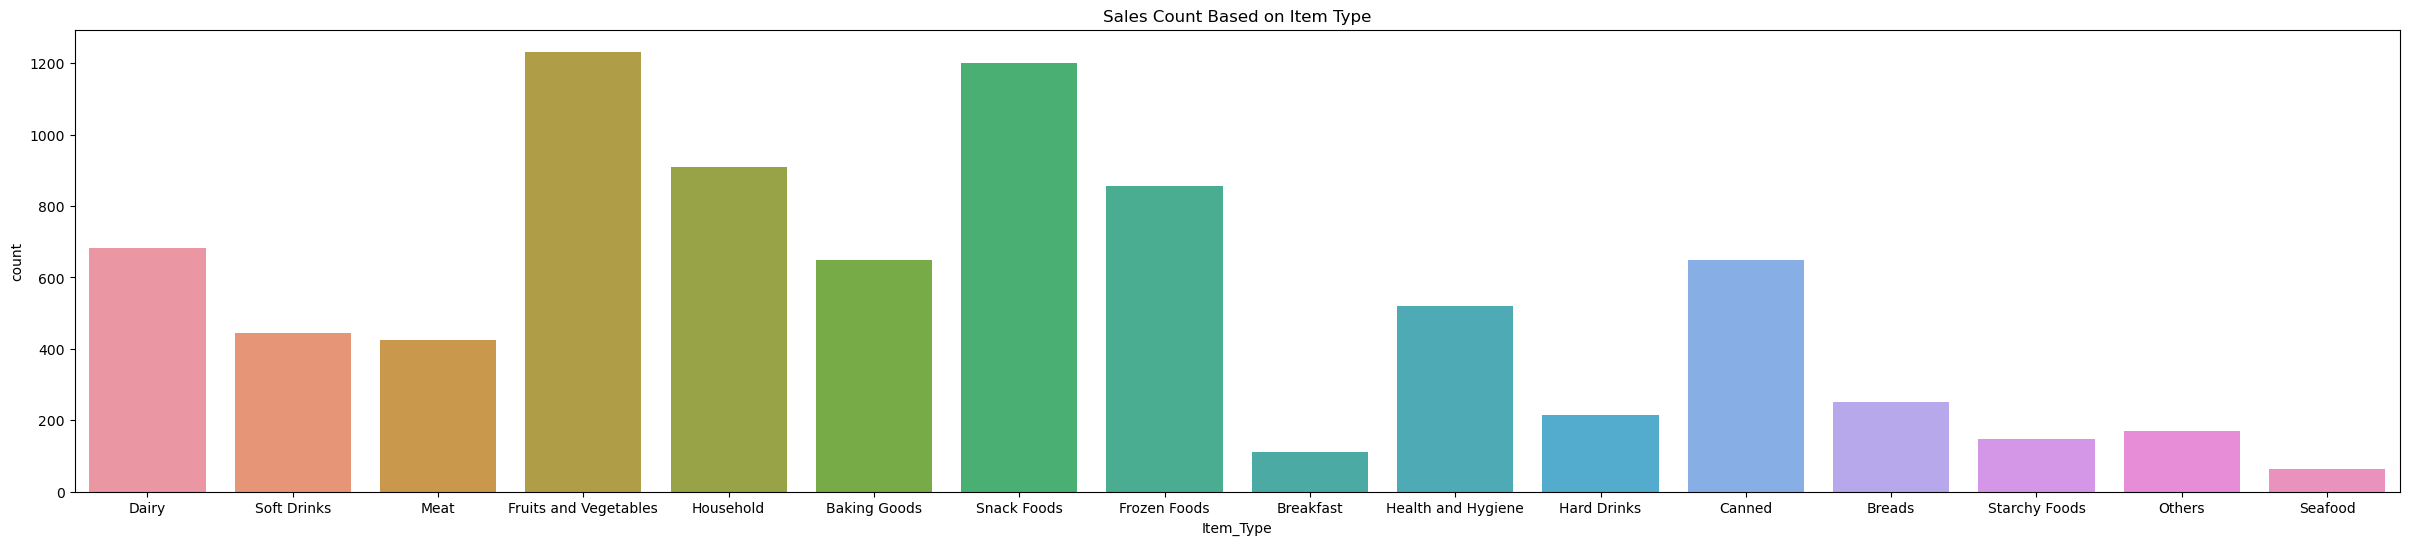

In [977]:
# Outlet_Establishment_Year column
plt.figure(figsize=(30,6))
sns.countplot(x="Item_Type",data=bigmart_dataset)
plt.title("Sales Count Based on Item Type")
plt.show()

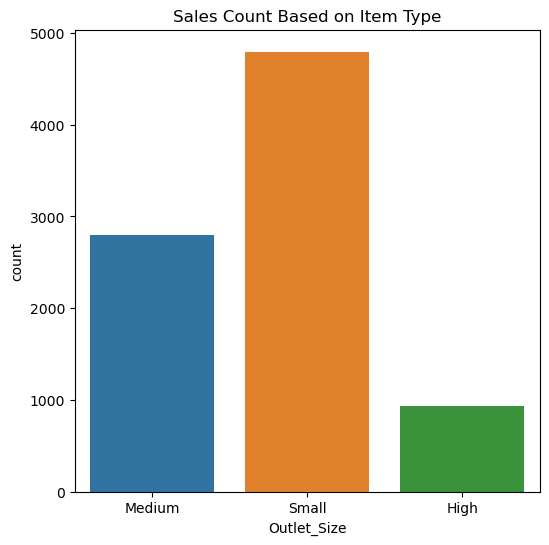

In [978]:
# Outlet_Size column
plt.figure(figsize=(6,6))
sns.countplot(x="Outlet_Size",data=bigmart_dataset)
plt.title("Sales Count Based on Item Type")
plt.show()

### Transforming the Repeated type of "Item_Fat_Content" to single format to avoid conflict while encoding the data

In [979]:
bigmart_dataset['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [980]:
bigmart_dataset.replace({'Item_Fat_Content':{'reg':"Regular","low fat":"Low Fat","LF":"Low Fat"}},inplace=True)

In [981]:
bigmart_dataset['Item_Fat_Content'].value_counts() # now it's transformed to single format

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

### Label Encoding 

In [982]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [983]:
bigmart_dataset.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [984]:
#encoding the Item_Identifier
bigmart_dataset['Item_Identifier'] = encoder.fit_transform(bigmart_dataset['Item_Identifier'])

#encoding the Item_Fat_Content
bigmart_dataset['Item_Fat_Content'] = encoder.fit_transform(bigmart_dataset['Item_Fat_Content'])

#encoding the Item_Type
bigmart_dataset['Item_Type'] = encoder.fit_transform(bigmart_dataset['Item_Type'])

#encoding the Outlet_Identifier
bigmart_dataset['Outlet_Identifier'] = encoder.fit_transform(bigmart_dataset['Outlet_Identifier'])

#encoding the Outlet_Size
bigmart_dataset['Outlet_Size'] = encoder.fit_transform(bigmart_dataset['Outlet_Size'])

#encoding the Outlet_Location_Type
bigmart_dataset['Outlet_Location_Type'] = encoder.fit_transform(bigmart_dataset['Outlet_Location_Type'])

#encoding the Outlet_Type
bigmart_dataset['Outlet_Type'] = encoder.fit_transform(bigmart_dataset['Outlet_Type'])

In [985]:
bigmart_dataset.tail() #now the columns are encoded to numerical values.

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,1,0.046982,0,108.1570,7,2002,2,1,1,549.2850
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2,1845.5976
8522,50,14.800,0,0.044878,14,75.4670,8,1997,2,0,1,765.6700


## Separating Dataset into X and Y 

In [986]:
X = bigmart_dataset.iloc[:, :-1]
y = bigmart_dataset.iloc[:, -1]

In [987]:
print(X.shape, y.shape)

(8523, 11) (8523,)


## Splitting Dataset to Training Set and Test Set

In [988]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [989]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(6818, 11) (1705, 11) (6818,) (1705,)


## Training The Model
- XGBooster Regressor

In [1016]:
from xgboost import XGBRegressor

regressor = XGBRegressor()

regressor.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [1029]:
#predicting the score using train data
trained_data_predicted = regressor.predict(X_train)

In [1030]:
print(trained_data_predicted)

[1971.906  2673.0098 3236.643  ... 3310.2896 1974.6288 2194.2717]


In [1037]:
# # testing the prediction score using r2_score
from sklearn.metrics import r2_score

r2_trained_score = r2_score(Y_train,trained_data_predicted)
print(r2_trained_score)

0.8560428500896411


In [1038]:
# #predicting the score using test data
test_data_predicted = regressor.predict(X_test)

In [1039]:
r2_test_data_score = r2_score(Y_test,test_data_predicted)
print(r2_test_data_score)

0.5218682845580893
